# Kernels for hand-made SVM

**In this homework we will again look at SVM kernels and will write and test rbf kernel for our own implementation.**

In [ ]:
'''
If you are using Google Colab, uncomment the next line to download `svm.py`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/assignment0_03_svm/svm.py 

In [2]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', cmap='autumn', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
from sklearn.datasets import make_circles

from sklearn.svm import SVC # "Support vector classifier"

X, y = make_circles(150, factor=.1, noise=.1, random_state=42)

X_test, y_test = X[100:], y[100:]
X, y = X[:100], y[:100]

### Sklearn realization:

Test accuracy:  0.64


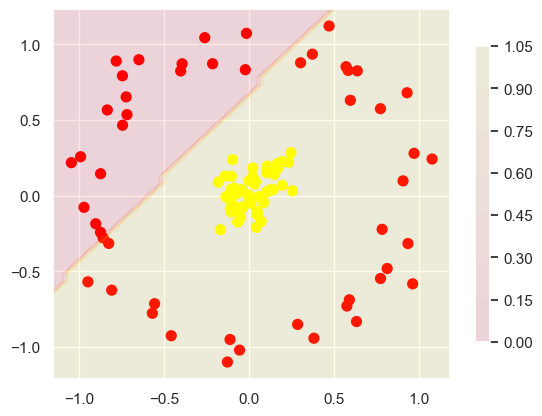

In [5]:
clf = SVC(kernel='linear').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Test accuracy:  1.0


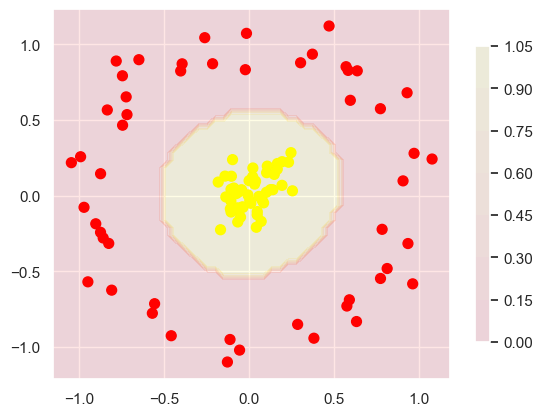

In [6]:
clf = SVC(kernel='rbf').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Let's look at our realization

### You need to open svm.py file and add all missed lines.

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

#### Radial basis function kernel.

####  The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

## $K(x,x') = \exp \bigl[- \frac{||x-x'||^2}{2 \sigma^2} \bigr].$

### Let's look how it works:

In [7]:
from svm import rbf, SVM

%load_ext autoreload
%autoreload 2

In [9]:
import torch

In [245]:
x_1 = torch.rand(7,5)
x_2 = torch.rand(8,5)
x_1, x_2

(tensor([[0.1940, 0.7486, 0.6749, 0.4412, 0.1415],
         [0.6576, 0.0090, 0.5520, 0.8226, 0.0678],
         [0.3812, 0.4492, 0.2056, 0.9113, 0.1922],
         [0.1702, 0.9670, 0.2415, 0.4922, 0.1047],
         [0.8773, 0.0572, 0.9570, 0.3926, 0.5441],
         [0.9720, 0.6986, 0.1210, 0.5183, 0.1974],
         [0.9393, 0.3563, 0.1825, 0.1217, 0.4209]]),
 tensor([[0.8055, 0.0917, 0.8400, 0.9943, 0.1473],
         [0.4679, 0.5749, 0.5166, 0.3298, 0.5308],
         [0.1098, 0.7723, 0.8942, 0.7894, 0.9393],
         [0.4269, 0.0719, 0.8647, 0.6371, 0.5841],
         [0.7955, 0.0906, 0.0894, 0.7897, 0.8402],
         [0.7167, 0.3813, 0.4551, 0.1065, 0.8406],
         [0.4900, 0.6796, 0.1876, 0.4980, 0.6656],
         [0.3908, 0.7754, 0.7409, 0.2272, 0.1698]]))

In [10]:
y[y==0] = -1 # for convenience with formulas
y_test[y_test==0] = -1

In [63]:
n_obj = len(X)
betas = torch.full((n_obj, 1), fill_value=0.001, requires_grad=True)

a=[]
for i in range(0,20):
    a.append([i])
#betas = torch.tensor(a)
K = torch.Tensor(np.dot(X, X.T)).type(torch.float32)
perm = torch.randperm(n_obj)
for i in range(0, n_obj, 20):
                batch_inds = perm[i:i + 20]
                #print(batch_inds)
                x_batch = X[batch_inds]   # Pick random samples by iterating over random permutation
                y_batch = y[batch_inds]
                k_batch = K[batch_inds]
#K.shape
x_batch.shape, y_batch.shape, k_batch.t().shape, betas[batch_inds].shape
#(k_batch.t()[batch_inds] @ betas[batch_inds]).shape

((20, 2), (20,), torch.Size([100, 20]), torch.Size([20, 1]))

In [27]:
a = np.array([-1,1,1,1,-1])
b = np.full(len(a), -1, dtype=np.int64)
b[a>0] = 1
b

array([-1,  1,  1,  1, -1], dtype=int64)

Epoch 0, Loss: 0.31288485527038573
Epoch 1, Loss: 0.37756800651550293
Epoch 2, Loss: 0.297489196062088
Test accuracy:  0.78


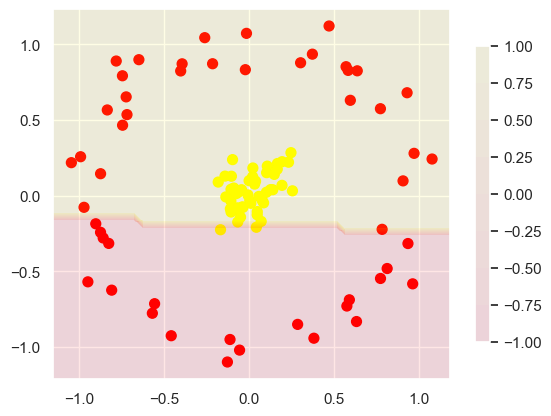

In [31]:
clf = SVM(epochs=3, lr=1, batch_size=20, verbose=True)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Epoch 0, Loss: 0.27872905433177947
Epoch 1, Loss: 0.23414623141288757
Epoch 2, Loss: 0.21459225118160247
Epoch 3, Loss: 0.22725355625152588
Epoch 4, Loss: 0.22548342645168304
Epoch 5, Loss: 0.1878852516412735
Epoch 6, Loss: 0.23406863808631898
Epoch 7, Loss: 0.2353803902864456
Epoch 8, Loss: 0.2227921098470688
Epoch 9, Loss: 0.25008387863636017
Epoch 10, Loss: 0.21599635779857634
Epoch 11, Loss: 0.22215782701969147
Epoch 12, Loss: 0.2410651981830597
Epoch 13, Loss: 0.18796979561448096
Epoch 14, Loss: 0.17258130013942719
Epoch 15, Loss: 0.14756721258163452
Epoch 16, Loss: 0.11534352600574493
Epoch 17, Loss: 0.17629351317882538
Epoch 18, Loss: 0.18397494480013848
Epoch 19, Loss: 0.16167651861906052
Epoch 20, Loss: 0.13151704221963884
Epoch 21, Loss: 0.11678042560815811
Epoch 22, Loss: 0.13282454013824463
Epoch 23, Loss: 0.1556973323225975
Epoch 24, Loss: 0.13184684067964553
Epoch 25, Loss: 0.14686065800487996
Epoch 26, Loss: 0.11140432357788085
Epoch 27, Loss: 0.08154225200414658
Epoch 2

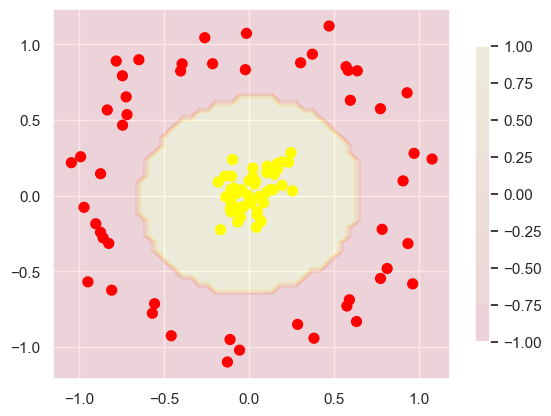

In [37]:
clf = SVM(epochs=100, lr=0.1, batch_size=20, verbose=True, kernel_function=rbf)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [38]:
assert accuracy_score(y_test, pred) > 0.95

## Our model with rbf kernel can learn this dataset too.